<a href="https://colab.research.google.com/github/metehangelgi/Customising-models-with-TensorFlow-2/blob/master/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.1
GPU name: 


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [3]:
# Download and assign the data set using load_data()

(x_train,y_train) , (x_test,y_test) = imdb.load_data()

17464789/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [5]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [6]:
# Inspect the shape of the data

x_train.shape

(25000,)

In [ ]:
# Display the first dataset element input
# Notice encoding

x_train[0]

In [8]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults

imdb.load_data(path='imdb.npz', index_from=3)
# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=1000)

In [ ]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10,num_words=1000,oov_char=2)

In [ ]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

In [ ]:
 # Use '1' as the character that indicates the start of a sequence

 imdb.load_data(start_char=1)

#### Explore the dataset word index

In [14]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [15]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3
imdb_word_index = {key:value+index_from for key,value in imdb_word_index.items()}

In [16]:
# Retrieve a specific word's index

imdb_word_index['simpsonian']

52256

In [ ]:
# View an input sentence

inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from]

In [20]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [ ]:
# Load the imdb data set

import tensorflow.keras.datasets.imdb as imdb
(x_train,y_train) , (x_test,y_test) = imdb.load_data()

#### Preprocess the data with padding

In [21]:
# Inspect the input data shape

x_train.shape

(25000,)

In [22]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,maxlen=300,padding='post',truncating='pre')

In [23]:
# Inspect the output data shape

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [24]:
# Import numpy 

import numpy as np

In [25]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train=np.expand_dims(padded_x_train,-1)

In [27]:
padded_x_train.shape

(25000, 300, 1)

In [29]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train,dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [30]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [ ]:
# Look at the dataset

masked_x_train

In [33]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [34]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501,output_dim=16)

In [43]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0],[1],[5],[100]]])
sequence_of_embeddings = embedding_layer(squence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.00683162, -0.04125202,  0.02956886, -0.01275561,
          -0.02572559,  0.04015834,  0.01685387,  0.02231326,
          -0.00362563, -0.03043395, -0.03415436, -0.02137926,
           0.03660449, -0.00164352, -0.01930697,  0.01802203]],

        [[-0.02779222, -0.04860726, -0.04172594, -0.04218994,
          -0.02476648, -0.01448127, -0.03458697, -0.04915101,
           0.01086599, -0.01452715,  0.00860845, -0.00344913,
          -0.01863144, -0.02548926,  0.02487507, -0.01143193]],

        [[ 0.00420375,  0.0457638 ,  0.04201842, -0.00848484,
          -0.03331447, -0.00151204,  0.03800658, -0.00387119,
          -0.00076082,  0.00674982,  0.03968871, -0.02164605,
          -0.01884557, -0.00424242, -0.03873167,  0.02429629]],

        [[-0.02188132,  0.00540143,  0.04155808, -0.03160359,
          -0.04529719,  0.02192623, -0.04042075, -0.02635664,
          -0.04621584,  0.00361568, -0.00489988,  0.03901703,
      

In [38]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[-0.00683162, -0.04125202,  0.02956886, ..., -0.00164352,
        -0.01930697,  0.01802203],
       [-0.02779222, -0.04860726, -0.04172594, ..., -0.02548926,
         0.02487507, -0.01143193],
       [-0.02992096,  0.01278618,  0.02347282, ..., -0.00941523,
        -0.02032115,  0.00121259],
       ...,
       [ 0.02140566,  0.03239157, -0.04069524, ...,  0.02950965,
         0.00273969, -0.04469932],
       [ 0.03174389, -0.04822497, -0.01440455, ..., -0.0453968 ,
         0.00653905,  0.03373189],
       [-0.01341678, -0.04786537,  0.03871204, ...,  0.01129492,
        -0.03413582,  0.03385799]], dtype=float32)

In [40]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14,:]

array([-0.03948408,  0.03276351, -0.02172588,  0.04628115, -0.00188512,
        0.00929922, -0.04808151, -0.0206763 ,  0.0086135 ,  0.04382391,
       -0.03166404,  0.01275196,  0.04628835, -0.03759841, -0.0340208 ,
        0.01990876], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [41]:
# Create a layer that uses the mask_zero kwarg

masking_embedded_layer = tf.keras.layers.Embedding(input_dim=501,output_dim=16,mask_zero=True)

In [44]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embeddings = masking_embedded_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [2]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [5]:
import tensorflow as tf

In [6]:
# Load the dataset

(x_train,y_train) , (x_test,y_test) = get_and_pad_imdb_dataset()

In [4]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [7]:
# Get the word index

imdb_word_index = get_imdb_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [8]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value:key for key,value in imdb_word_index.items()}

In [9]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [10]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())


In [11]:
# Specify an embedding dimension
embedding_dim = 16


In [14]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim = embedding_dim,mask_zero = False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(units=1,activation='sigmoid')

])

In [16]:
# Functional API refresher: use the Model to build the same model

input_seq = tf.keras.Input((None,))
h = tf.keras.layers.Embedding(input_dim=max_index_value+1,output_dim = embedding_dim,mask_zero = False)(input_seq)
h = tf.keras.layers.GlobalAveragePooling1D()(h)
output = tf.keras.layers.Dense(units=1,activation='sigmoid')(h)
model = tf.keras.Model(inputs=input_seq,outputs = output)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 16)          160016    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [18]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [19]:
# Train the model using .fit(), savng its history

history = model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test),validation_steps=20)

Epoch 1/5
782/782 [==============================] - 9s 11ms/step - loss: 0.6894 - accuracy: 0.5550 - val_loss: 0.6831 - val_accuracy: 0.6297
Epoch 2/5
782/782 [==============================] - 9s 11ms/step - loss: 0.6687 - accuracy: 0.6724 - val_loss: 0.6482 - val_accuracy: 0.7516
Epoch 3/5
782/782 [==============================] - 9s 11ms/step - loss: 0.6258 - accuracy: 0.7490 - val_loss: 0.5990 - val_accuracy: 0.7297
Epoch 4/5
782/782 [==============================] - 8s 11ms/step - loss: 0.5739 - accuracy: 0.7902 - val_loss: 0.5497 - val_accuracy: 0.7906
Epoch 5/5
782/782 [==============================] - 8s 11ms/step - loss: 0.5244 - accuracy: 0.8214 - val_loss: 0.5073 - val_accuracy: 0.7969


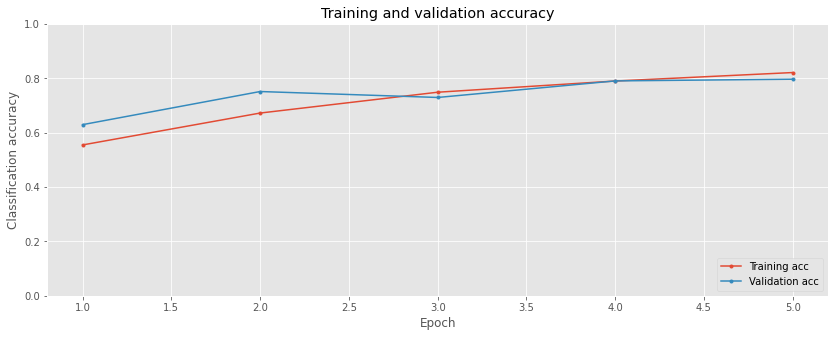

In [20]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [23]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [24]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('/content/drive/MyDrive/UniversityTerms/summer2022/Tensorflow-customizing', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('/content/drive/MyDrive/UniversityTerms/summer2022/Tensorflow-customizing', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [ ]:
# Create a SimpleRNN layer and test it



In [ ]:
# Note that only the final cell output is returned



#### Load and transform the IMDB review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset




In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()



#### Create a recurrent neural network model

In [ ]:
# Get the maximum index value



In [ ]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.



#### Compile and fit the model

In [ ]:
# Compile the model with binary cross-entropy loss



In [ ]:
# Fit the model and save its training history



#### Plot learning curves

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [ ]:
# View the first test data example sentence
# (invert the word index)



In [ ]:
# Get the model prediction using model.predict()



In [ ]:
# Get the corresponding label



---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset



In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()



#### Build stacked and bidirectional recurrent models

In [ ]:
# Get the maximum index value and specify an embedding dimension



In [ ]:
# Using Sequential, build a stacked LSTM model via return_sequences=True



In [ ]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'



In [ ]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer



#### Compile and fit the model

In [ ]:
# Compile the model



In [ ]:
# Train the model, saving its history



In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);